In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# iris data
iris = load_iris()

X = iris.data
y = iris.target

# Split the data into training and testing sets
(
    X_train, X_test,
    y_train, y_test
) = train_test_split(
    X, y,
    test_size=0.3,
    random_state=0
)

In [ ]:
y_test.shape

(45,)

In [ ]:
# KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predictions
y_pred = knn.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9778


Text(0.5, 1.0, 'Confusion Matrix')

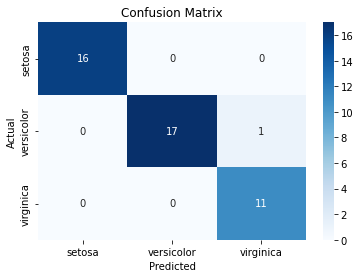

In [ ]:
# plot confusion matrix
# add class labels
class_names = iris.target_names
# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [ ]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

### Classfication metrics

##### Accuracy (ACC):

$$ACC = \frac{TP + TN}{TP + TN + FP + FN}$$

##### Precision (PREC):
$$PREC = \frac{TP}{TP + FP}$$


In [ ]:
# compute precision from sklearn.metrics
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.4f}")

Precision: 0.9722


* Recall (Sensitivity or True Positive Rate, TPR):
   - $TPR = \frac{TP}{TP + FN}$


* Specificity (True Negative Rate, TNR):
   - $TNR = \frac{TN}{TN + FP}$



* False Positive Rate (FPR):
   - $FPR = \frac{FP}{FP + TN}$


* False Negative Rate (FNR):
   - $FNR = \frac{FN}{FN + TP}$

### Data scale

In [ ]:
# iris as dataframe
iris_df = pd.DataFrame(
    data=iris.data,
    columns=iris.feature_names
)
iris_df['target'] = iris.target
iris_df['target_names'] = iris_df.target.apply(lambda x: iris.target_names[x])
iris_df.head()
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# minmax scaler
minmax_scaler = MinMaxScaler(feature_range=(-1, 1))
